In [178]:
import pandas as pd
import os

def get_dataframe(dataset_path, encoding="utf-8"):
    try:
        # List all files in the dataset directory
        files = os.listdir(dataset_path)

        # Dictionary to store DataFrames
        dataframes = {}

        # Loop through each file
        for file in files:
            file_path = os.path.join(dataset_path, file)

            # Check for .csv or .txt files
            if file.endswith(".csv"):
                data = pd.read_csv(file_path, engine='c', encoding=encoding)
                dataframes[file] = data
            elif file.endswith(".txt"):
                data = pd.read_csv(file_path, delimiter='[|\t]', engine='python', header=None, encoding=encoding)
                dataframes[file] = data
        return dataframes
    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [179]:
kmrd_path = "../../kmrd-small"
dataframes = get_dataframe(kmrd_path)
print(f"{dataframes.keys()}")

dict_keys(['countries.csv', 'movies.txt', 'genres.csv', 'rates.csv', 'peoples.txt', 'castings.csv'])


In [180]:
# genres.csv 데이터프레임 불러오기
genres_df = dataframes['genres.csv']

print(genres_df.head(3))
# genres_df.info()

   movie   genre
0  10001     드라마
1  10001  멜로/로맨스
2  10002      SF


In [181]:
# rates.csv 데이터프레임 불러오기
rates_df = dataframes['rates.csv']

# Unix 타임스탬프를 datetime으로 변환
rates_df['time'] = pd.to_datetime(rates_df['time'], unit='s')

# 결과 확인
print(rates_df.head(3))

   user  movie  rate                time
0     0  10003     7 2017-05-07 03:34:00
1     0  10004     7 2016-07-03 07:10:00
2     0  10018     9 2017-12-15 13:22:00


## barplot

In [182]:
import matplotlib.pyplot as plt
import numpy as np

def create_barplot(df, x_label, y_label):
    """
    Create a barplot using Matplotlib without Seaborn.

    Args:
        df (DataFrame): The DataFrame containing the data.
        x_label (str): The column name to use for the x-axis.
        y_label (str): The column name to use for the y-axis.

    Returns:
        None: Displays the plot.
    """
    plt.figure(figsize=(20, 10))  # 그래프 크기 조정

    x = df[x_label]
    y = df[y_label]

    # 막대 그래프 생성
    indices = np.arange(len(x))  # x축 위치 설정
    plt.bar(indices, y, align='center', alpha=0.8)

    # x축 레이블과 틱 설정
    plt.xticks(indices, x, rotation=45, fontsize=10)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # 제목 추가
    plt.title(f'{x_label}별 {y_label}', fontsize=14)
    plt.tight_layout()  # 레이아웃 조정
    plt.show()

### 장르별 영화 수

In [183]:
genre_counts = genres_df.groupby('genre').agg(
    movie_count=('movie', 'count')
).reset_index()

print(genre_counts)

     genre  movie_count
0       SF           80
1       가족           40
2       공포           79
3      느와르           15
4    다큐멘터리            3
5      드라마          529
6   멜로/로맨스          172
7       모험          117
8      뮤지컬           41
9     미스터리           48
10      범죄          117
11      서부           31
12      서사            1
13     스릴러          162
14   애니메이션            6
15      액션          211
16      에로           10
17      전쟁           75
18     코미디          233
19     판타지           55


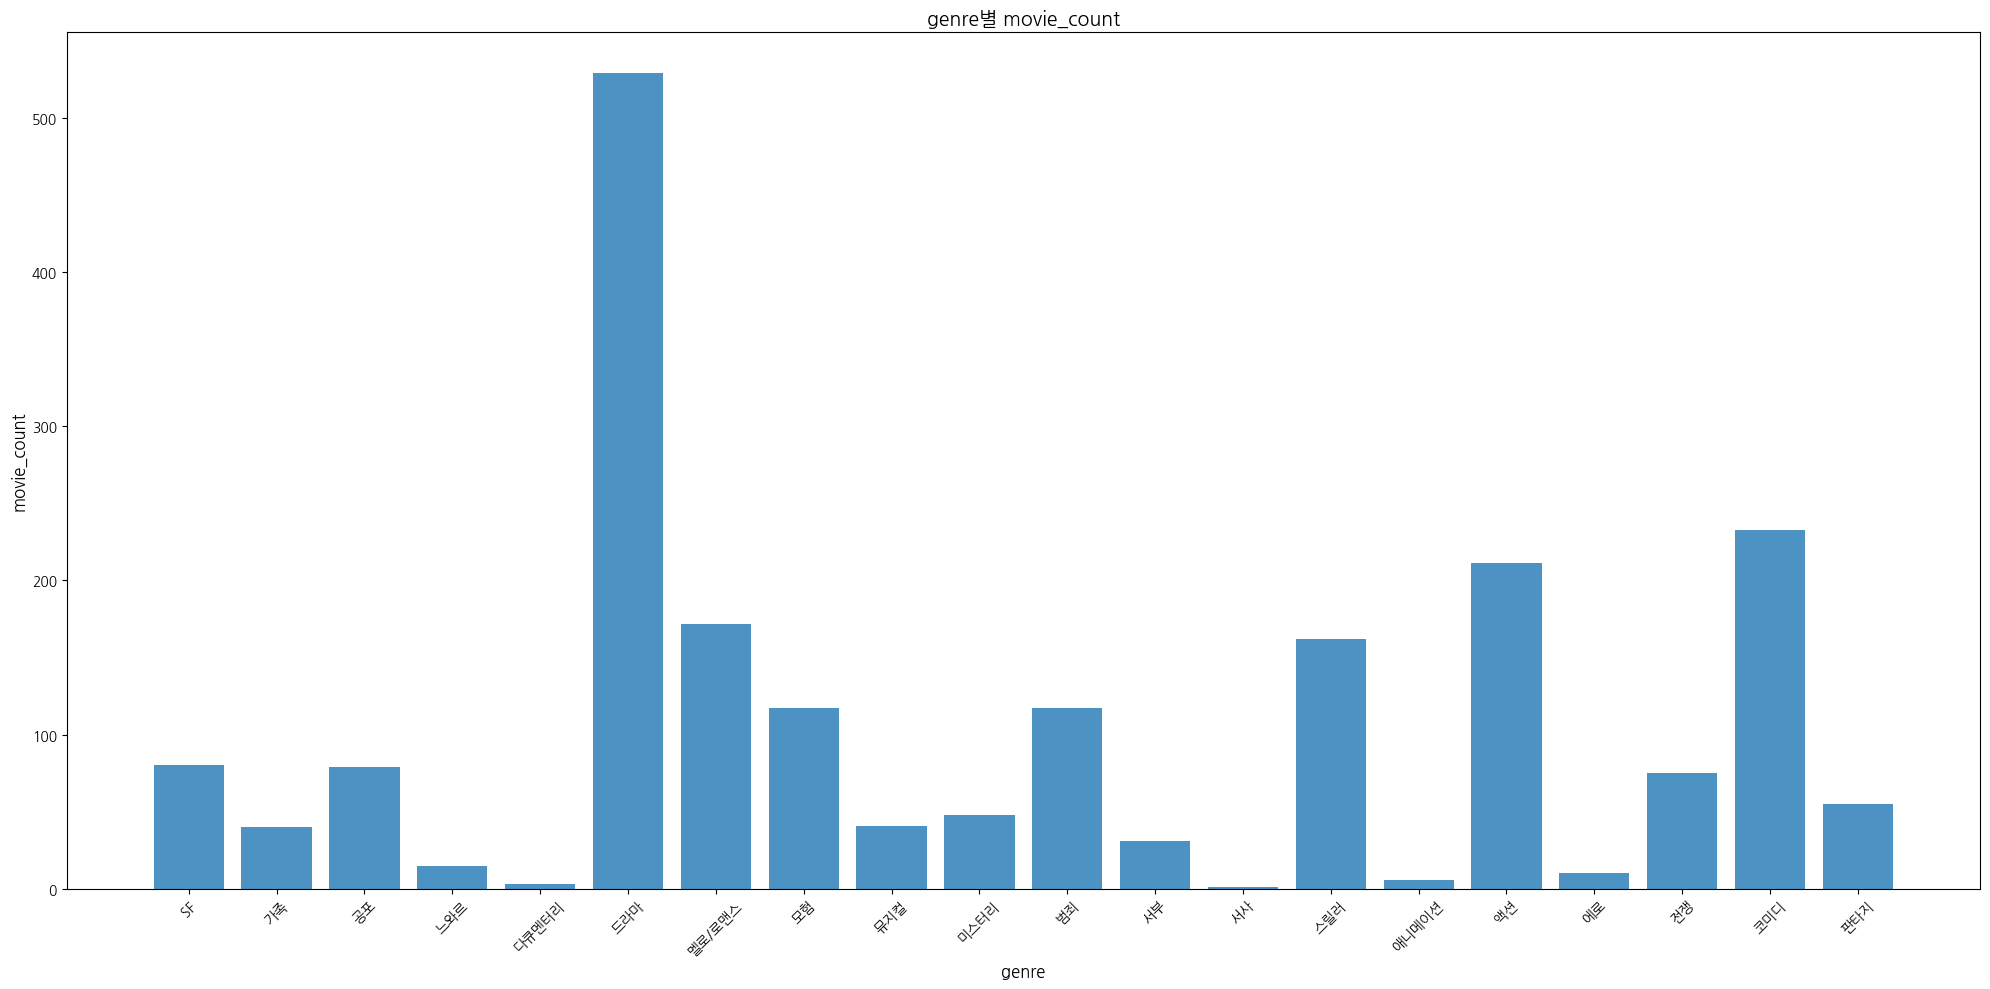

In [184]:
create_barplot(genre_counts, 'genre', 'movie_count')

### 장르별 평균 평점

In [185]:
genres_rate = genres_df.merge(rates_df[['movie', 'rate']], on='movie')
genres_rate.head()

,movie,genre,rate
0,10001,드라마,10
1,10001,드라마,10
2,10001,드라마,10
3,10001,드라마,10
4,10001,드라마,10


In [186]:
genres_rate = genres_rate.groupby('genre').agg(
    mean_rate=('rate', 'mean')
).reset_index()

genres_rate = genres_rate.sort_values(by='mean_rate', ascending=False).reset_index()
print(genres_rate)

    index   genre  mean_rate
0       8     뮤지컬   9.233288
1      12      서사   9.209619
2       0      SF   9.053674
3      19     판타지   9.034153
4      10      범죄   9.013579
5       6  멜로/로맨스   9.007665
6       1      가족   8.976904
7      13     스릴러   8.976111
8       5     드라마   8.965973
9       3     느와르   8.965353
10      7      모험   8.958822
11     18     코미디   8.954238
12     11      서부   8.947997
13     15      액션   8.911821
14      2      공포   8.834317
15     17      전쟁   8.715259
16      9    미스터리   8.690435
17      4   다큐멘터리   8.000000
18     14   애니메이션   7.760434
19     16      에로   5.564103


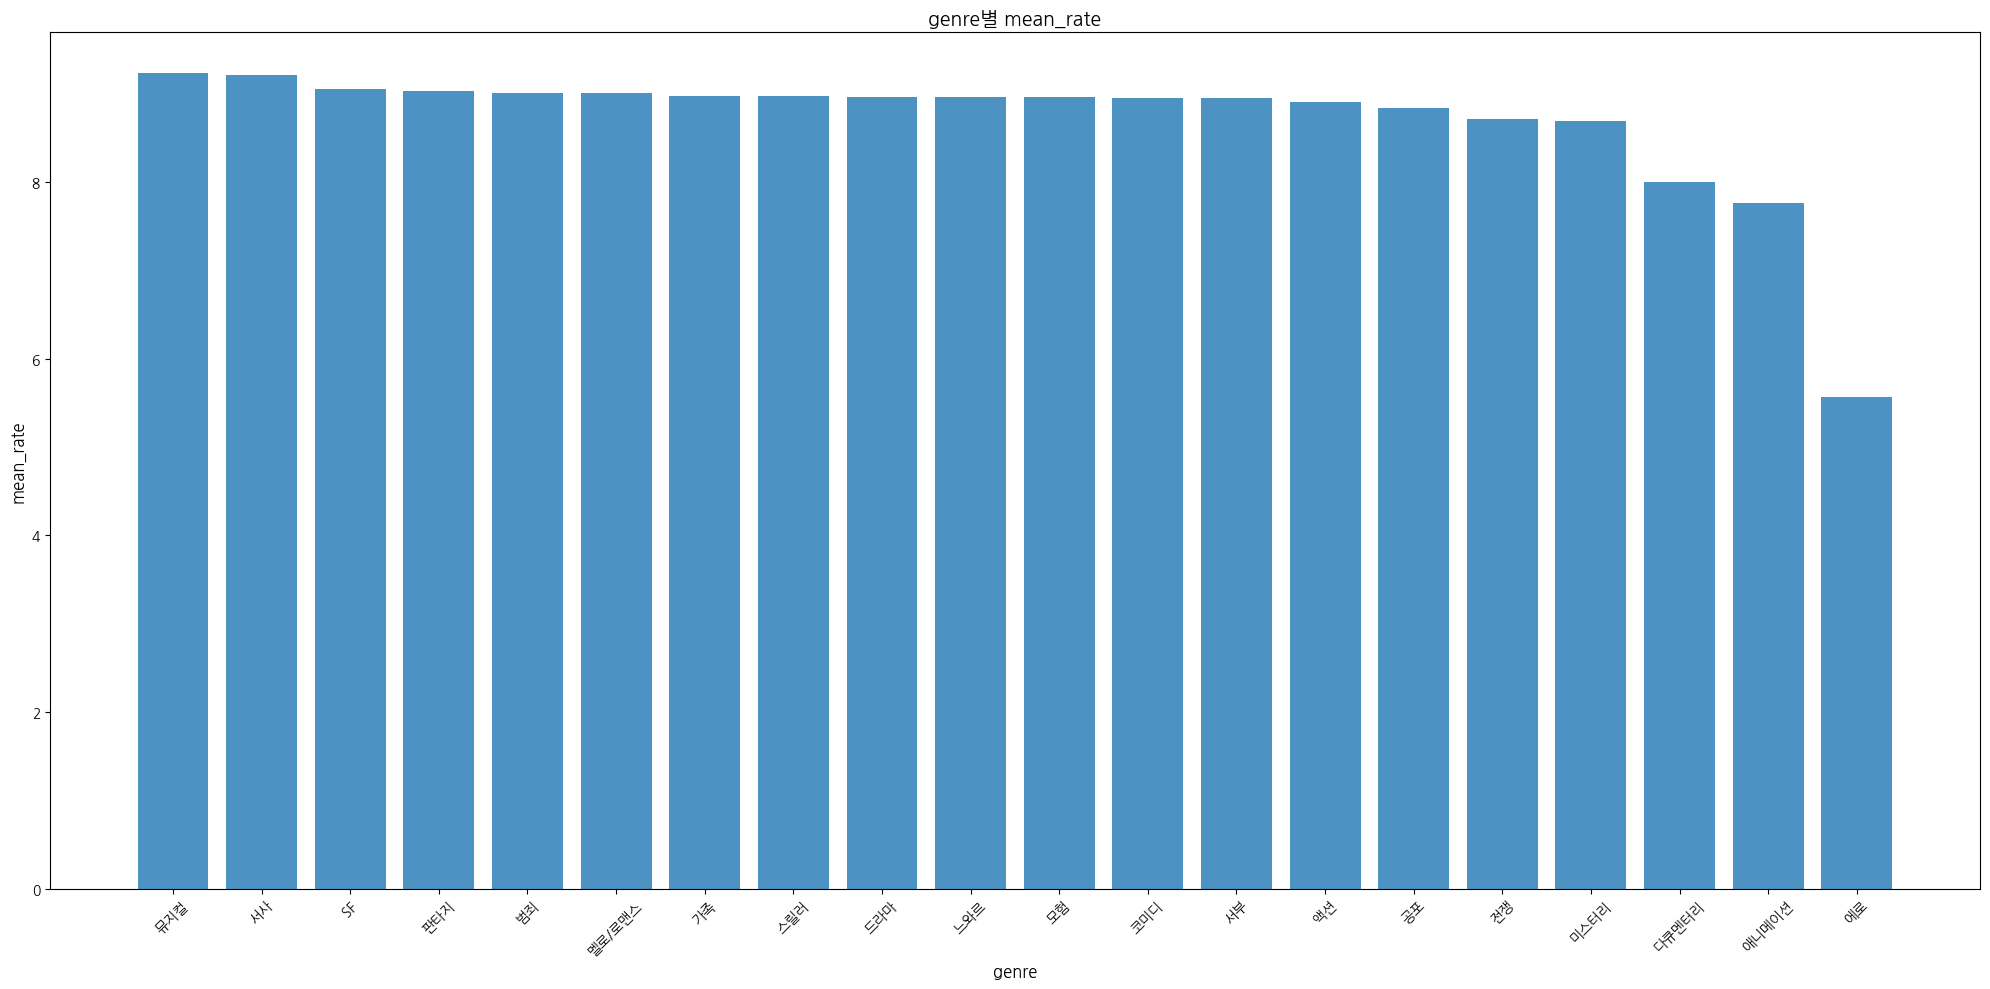

In [187]:
create_barplot(genres_rate, 'genre', 'mean_rate')